<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/samplingDesign/PrincipalComponentsOfImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis of an Image
## David Brady
## University of Arizona
## Summer 2023

We consider an image as a stocastic process. Breaking the image in to blocks, we consider each block as a realization of the underlying process and find the principal components.

### libraries 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})

## PCA of an Image

In [ ]:
!wget --no-check-certificate --content-disposition 'https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/tree.png' 
img=cv2.imread('tree.png')
img=img[:,0:464,:]

--2023-05-30 12:46:33--  https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/tree.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/tree.png [following]
--2023-05-30 12:46:34--  https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/tree.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 422157 (412K) [image/png]
Saving to: ‘tree.png’

tree.png            100%[===================>] 412.26K  --.-KB/s    in 0.03s   

2023-05-30 12:46:34 (11.8 MB/

In [ ]:
img=cv2.imread('tree.png')
img=img[:,0:464,:]

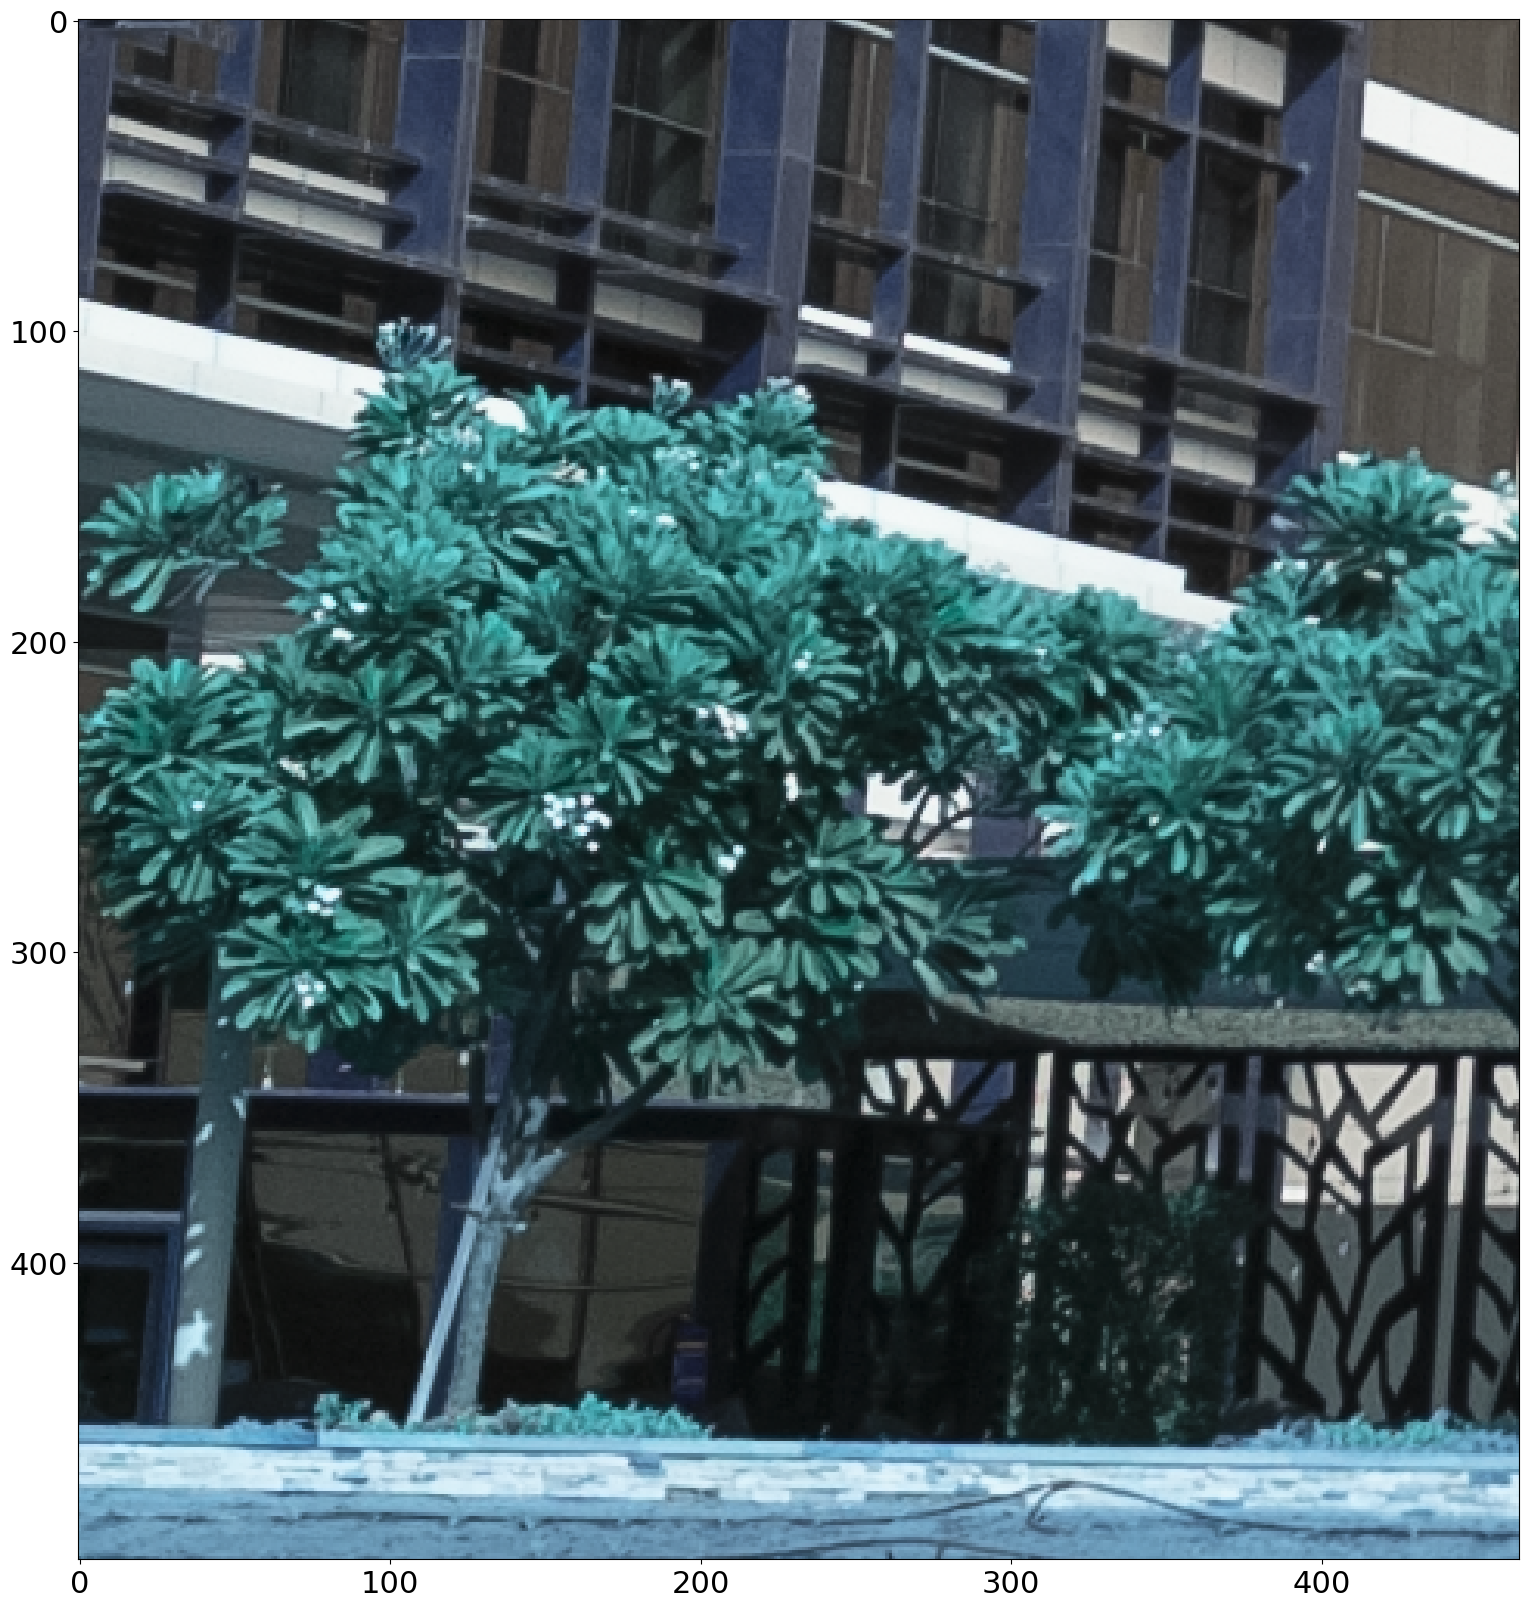

In [ ]:
plt.imshow(img)

In [ ]:
reds=img[:,:,0]
redsM=reds-np.mean(reds)

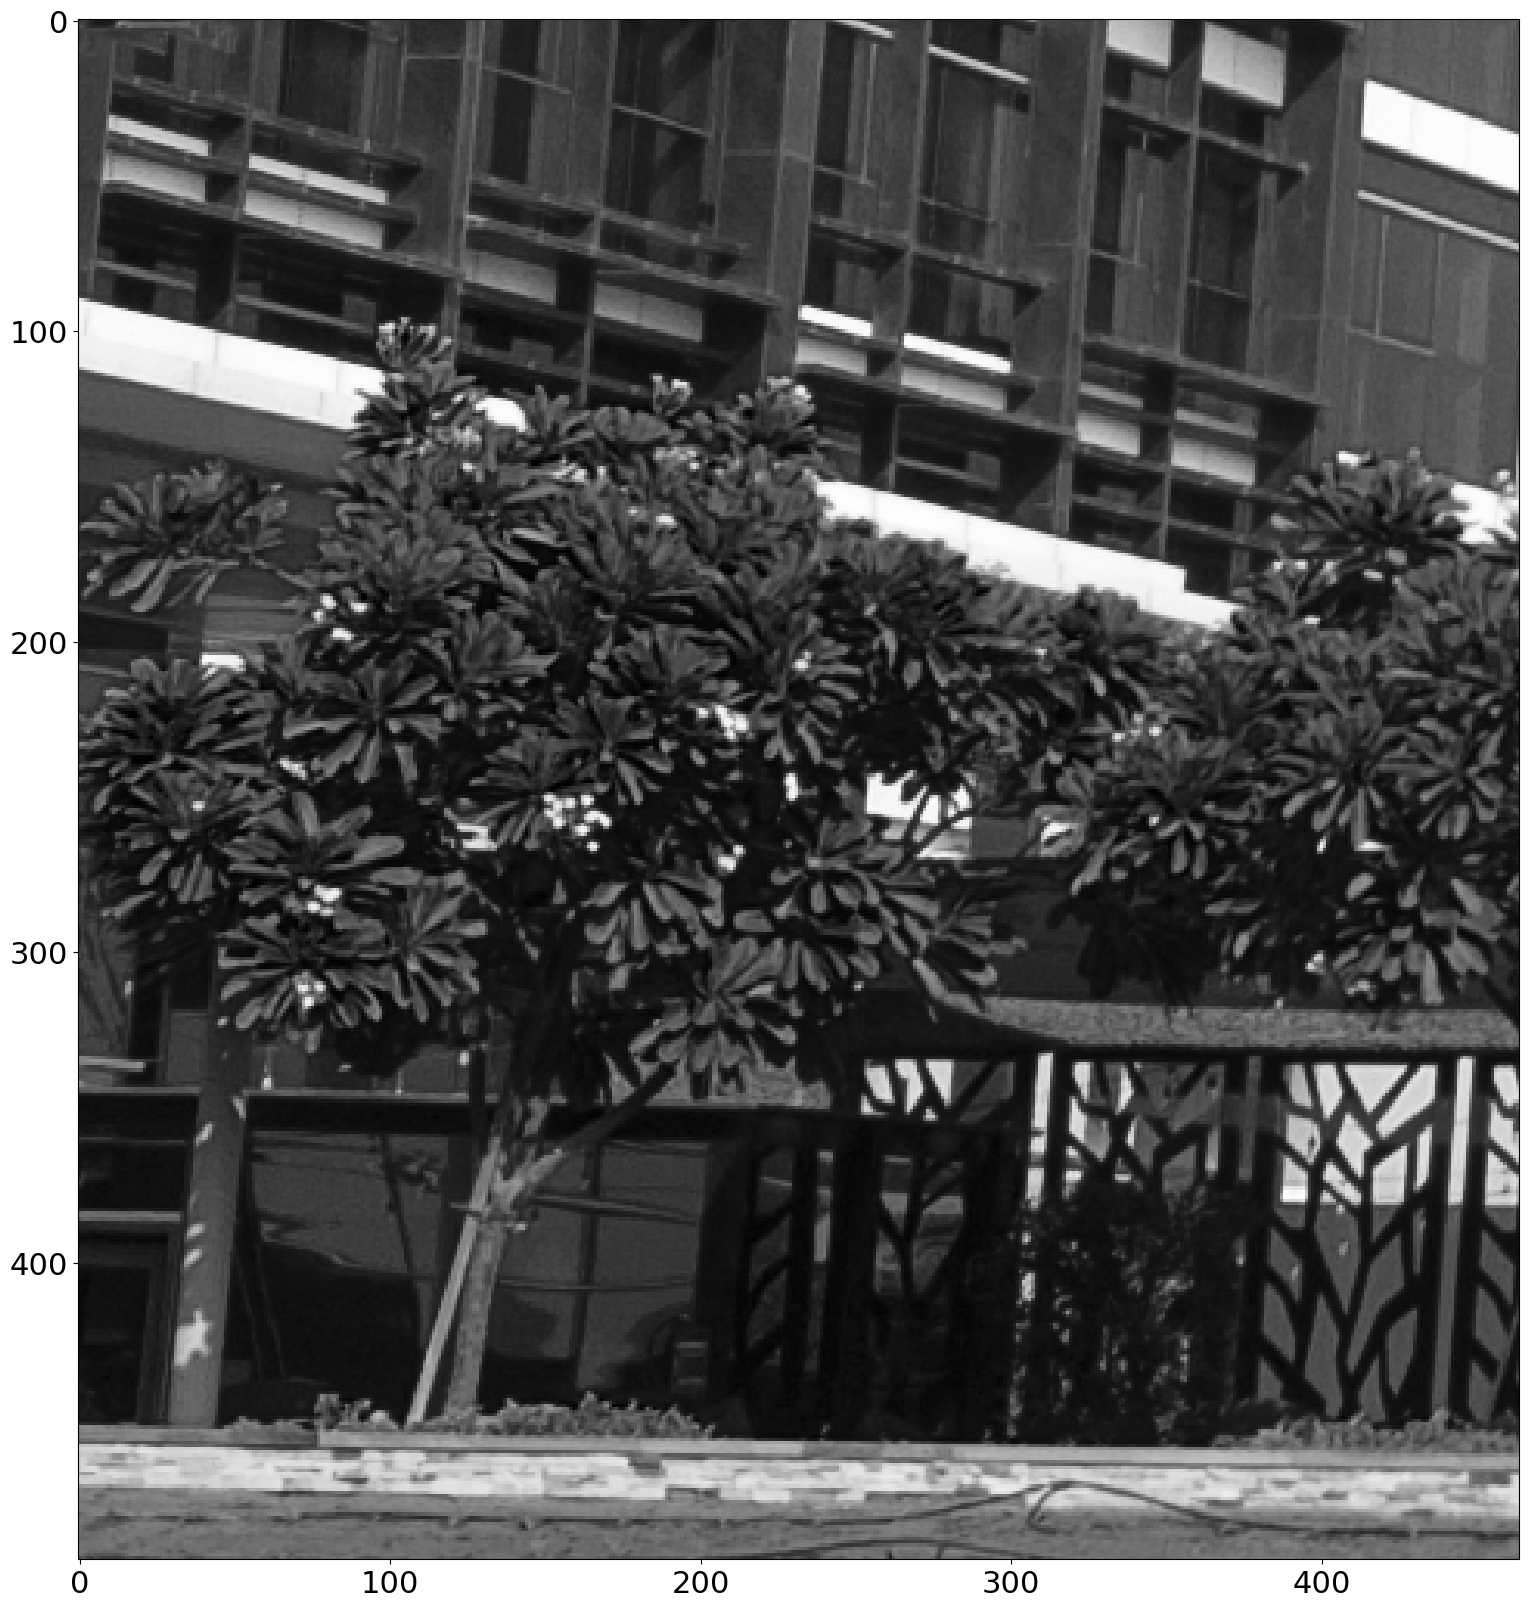

In [ ]:
plt.imshow(reds, cmap='gray')

### reformat the image into blocks

In [ ]:
bL=16 # each block is bl by bl
a, b=(np.array(reds.shape)/bL).astype('int16')
X=np.zeros((a*b,bL*bL))
for pip in range(a):
  for pop in range(b):
    X[pip*b+pop,:]=np.ndarray.flatten(reds[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL)])




In [ ]:
X.shape

(899, 256)

In [ ]:
pca=PCA(n_components=128)

In [ ]:
pca.fit(X)

PCA(n_components=128)

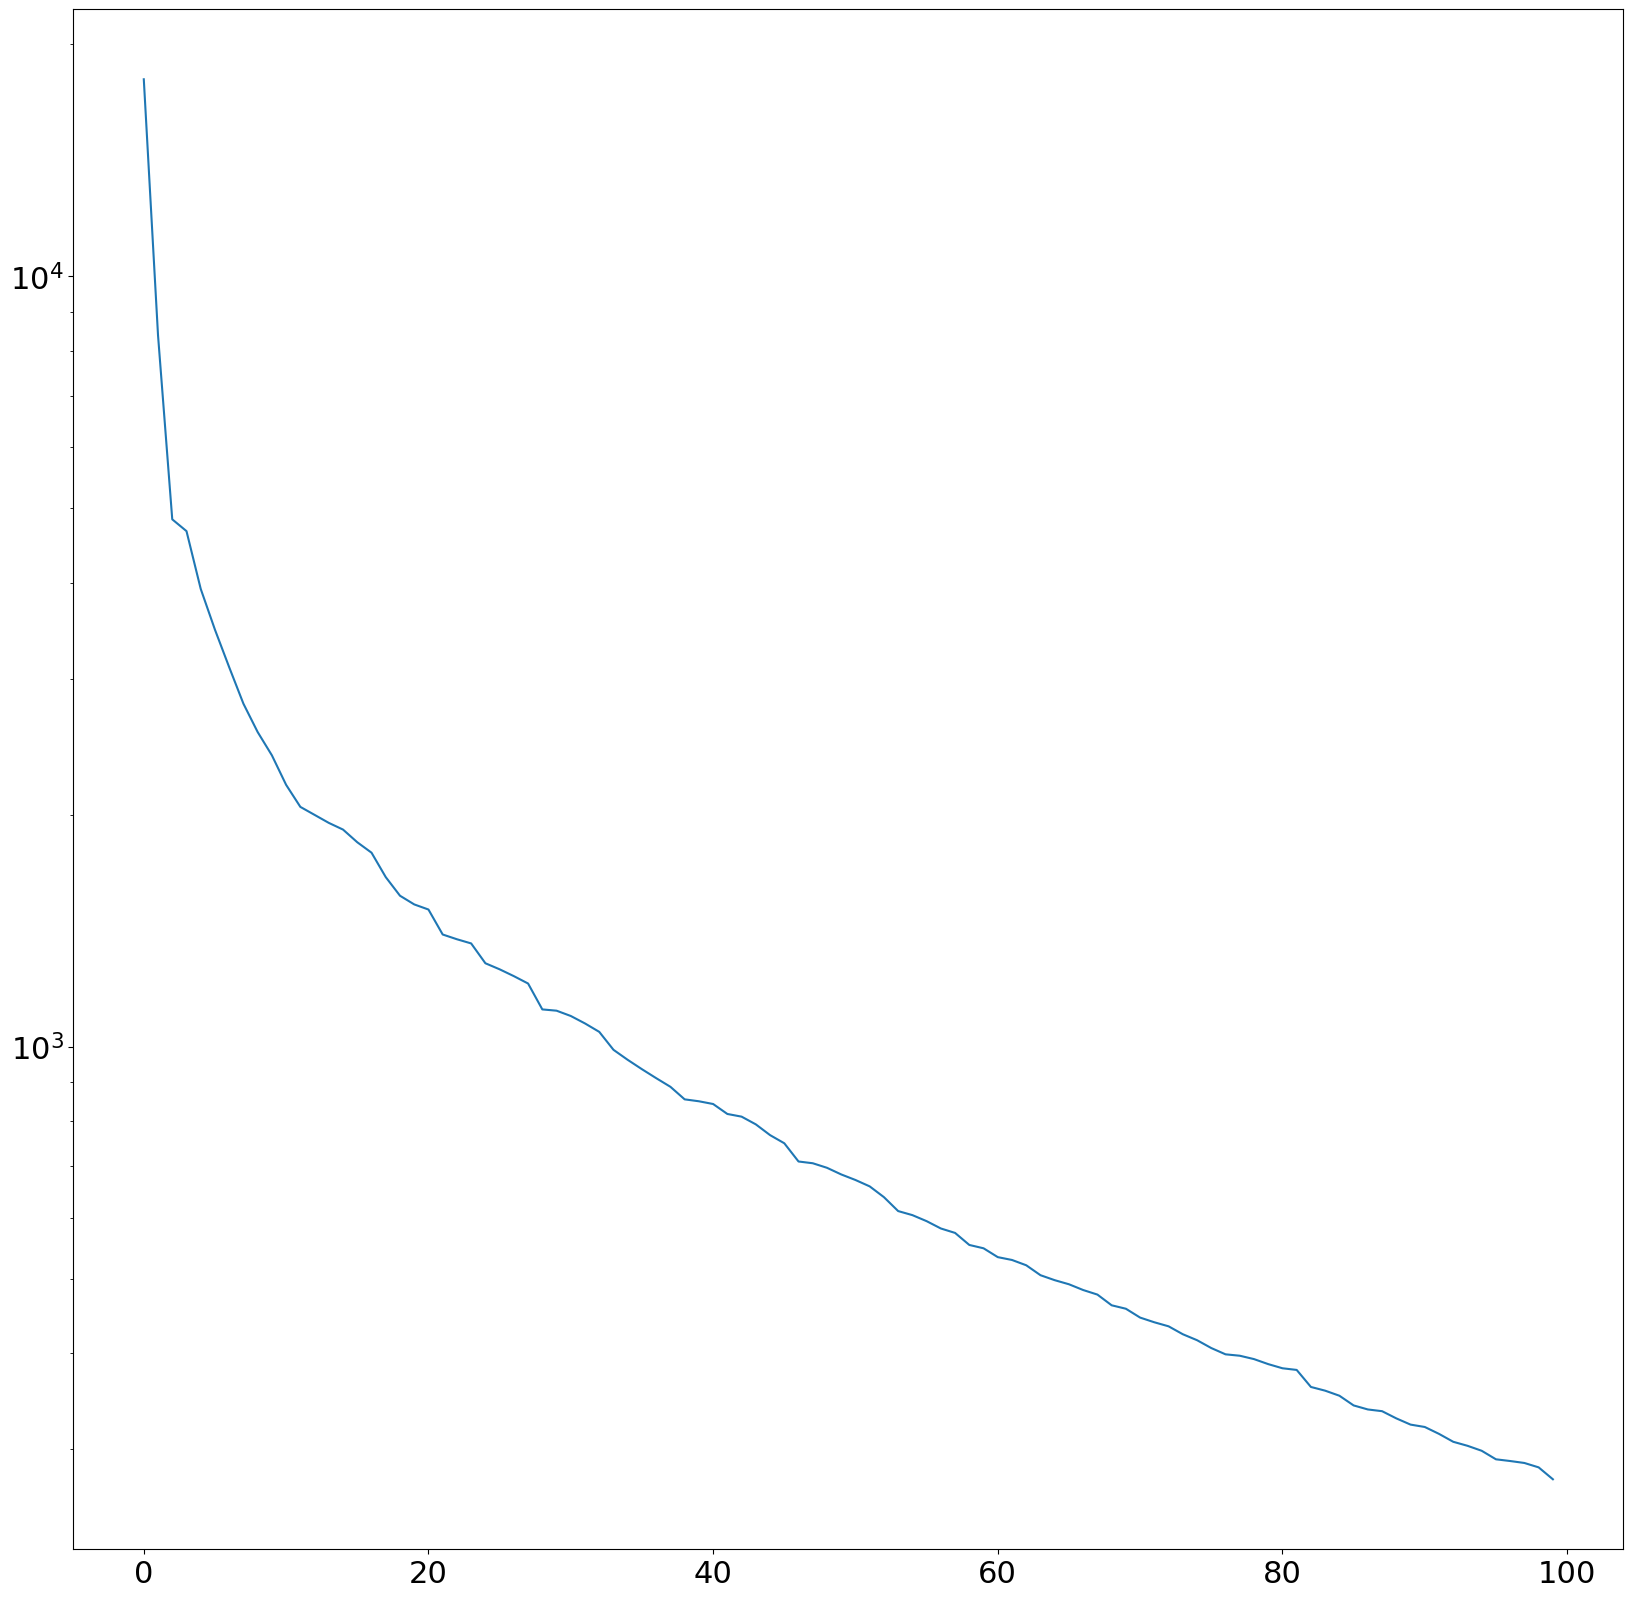

In [ ]:
plt.semilogy(pca.singular_values_)


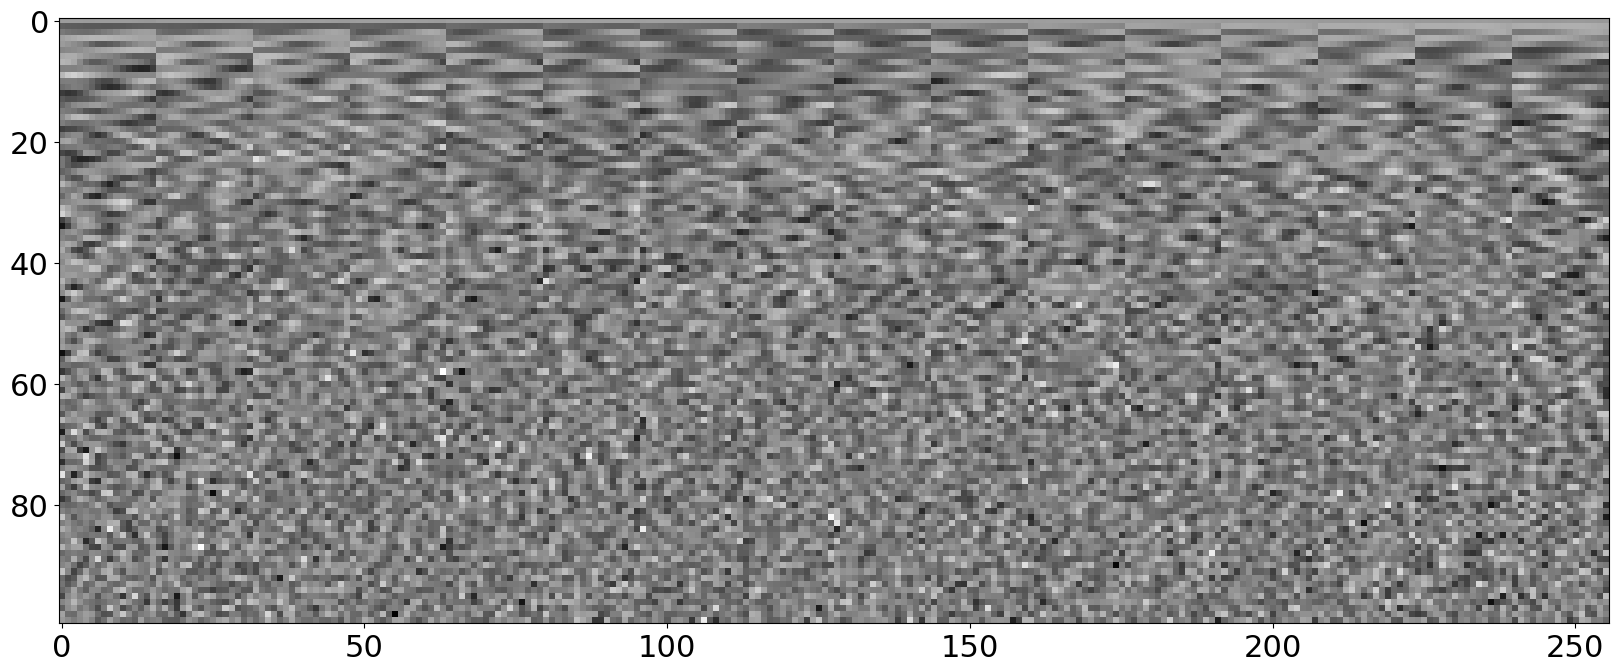

In [ ]:
plt.imshow(pca.components_, cmap='gray')

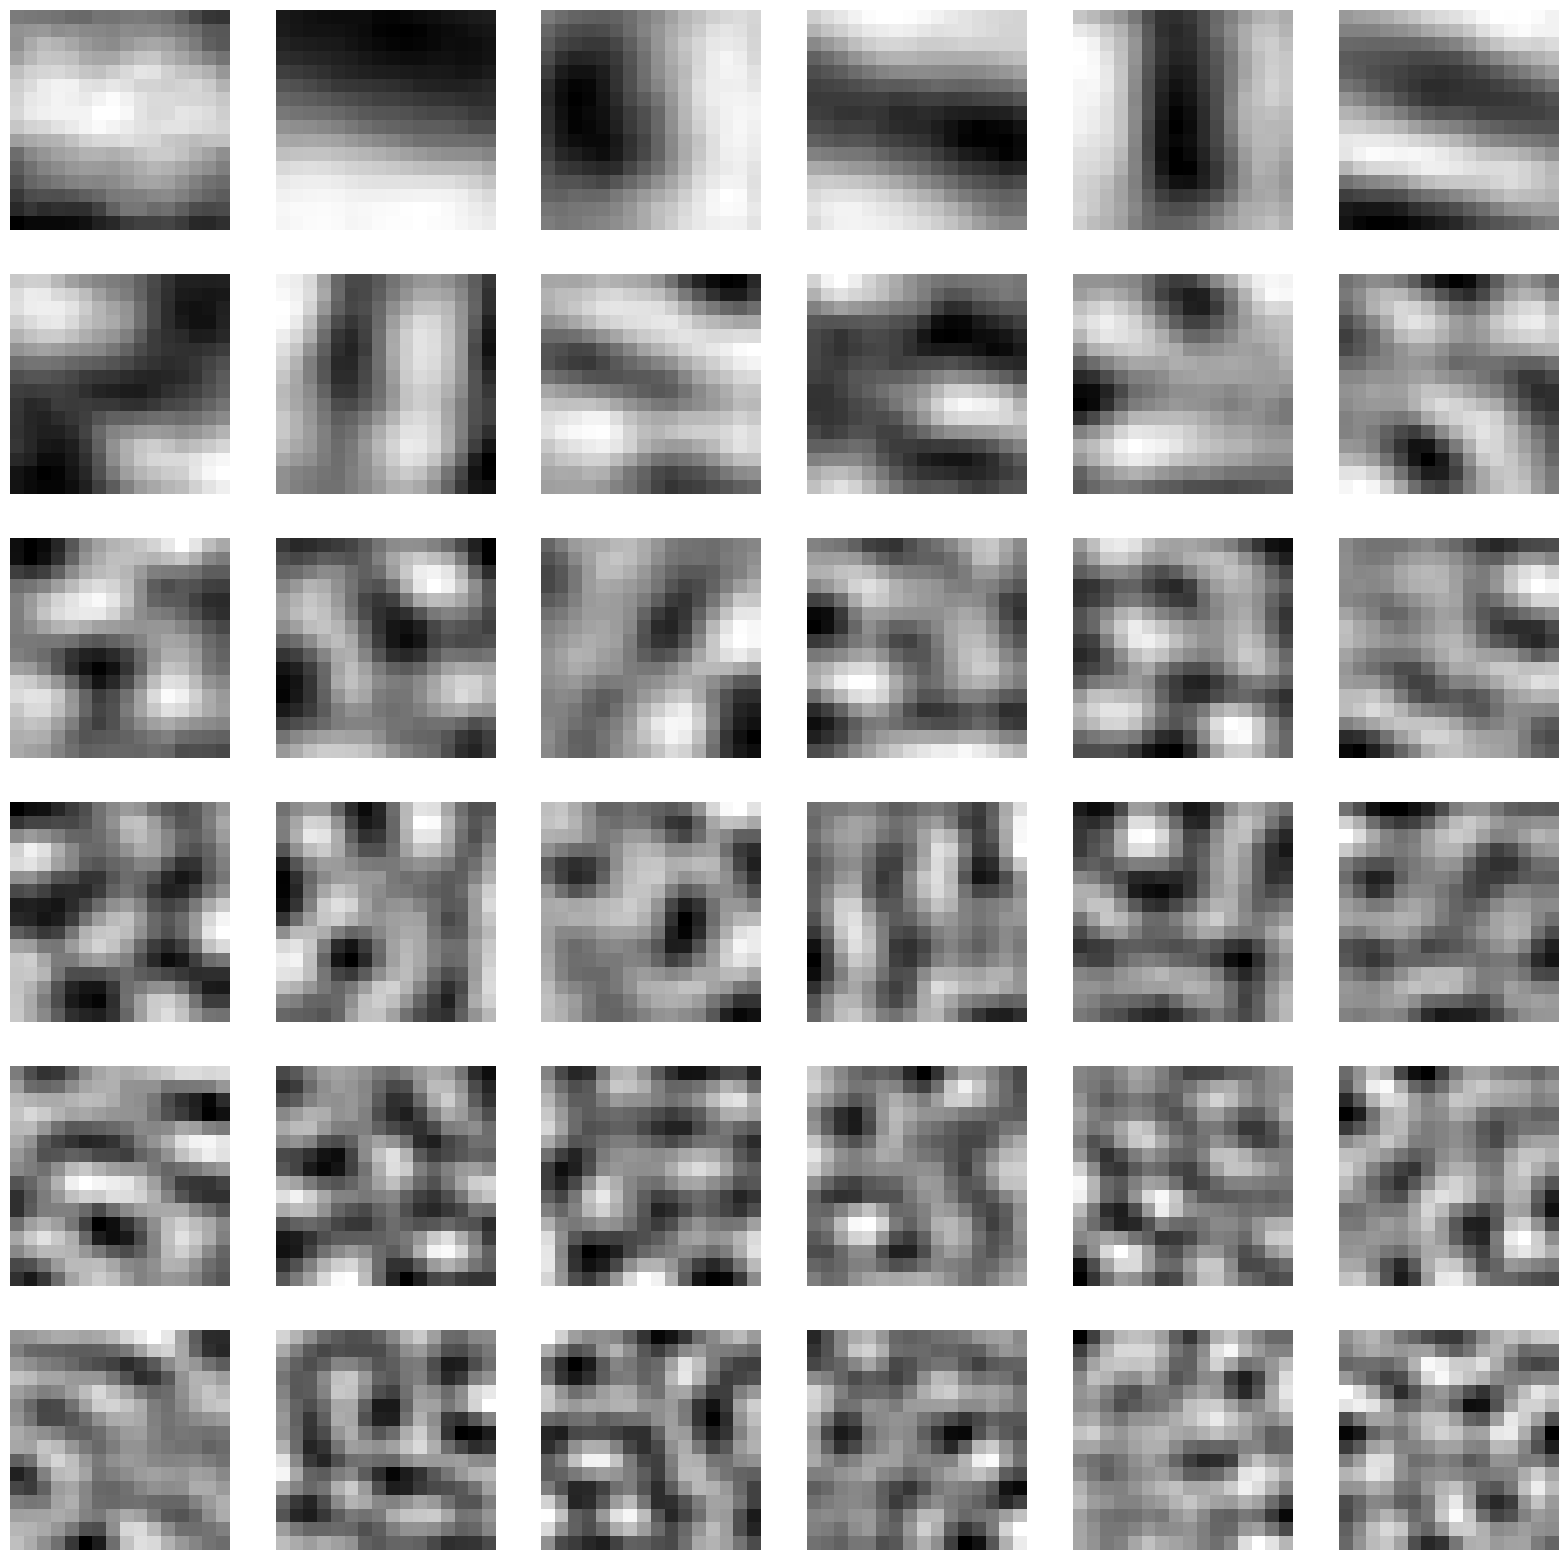

In [ ]:
plt.figure(figsize=(20,20))
for pip in range (36):
    plt.subplot(6,6,pip+1)
    plt.imshow(np.reshape(pca.components_[pip],(16,16)),cmap='gray')
    plt.axis('off')
    plt.savefig('pcomponents.pdf')


### projection of the image onto PCA basis

Projection matrix

In [ ]:
P=pca.components_[0:32,:]

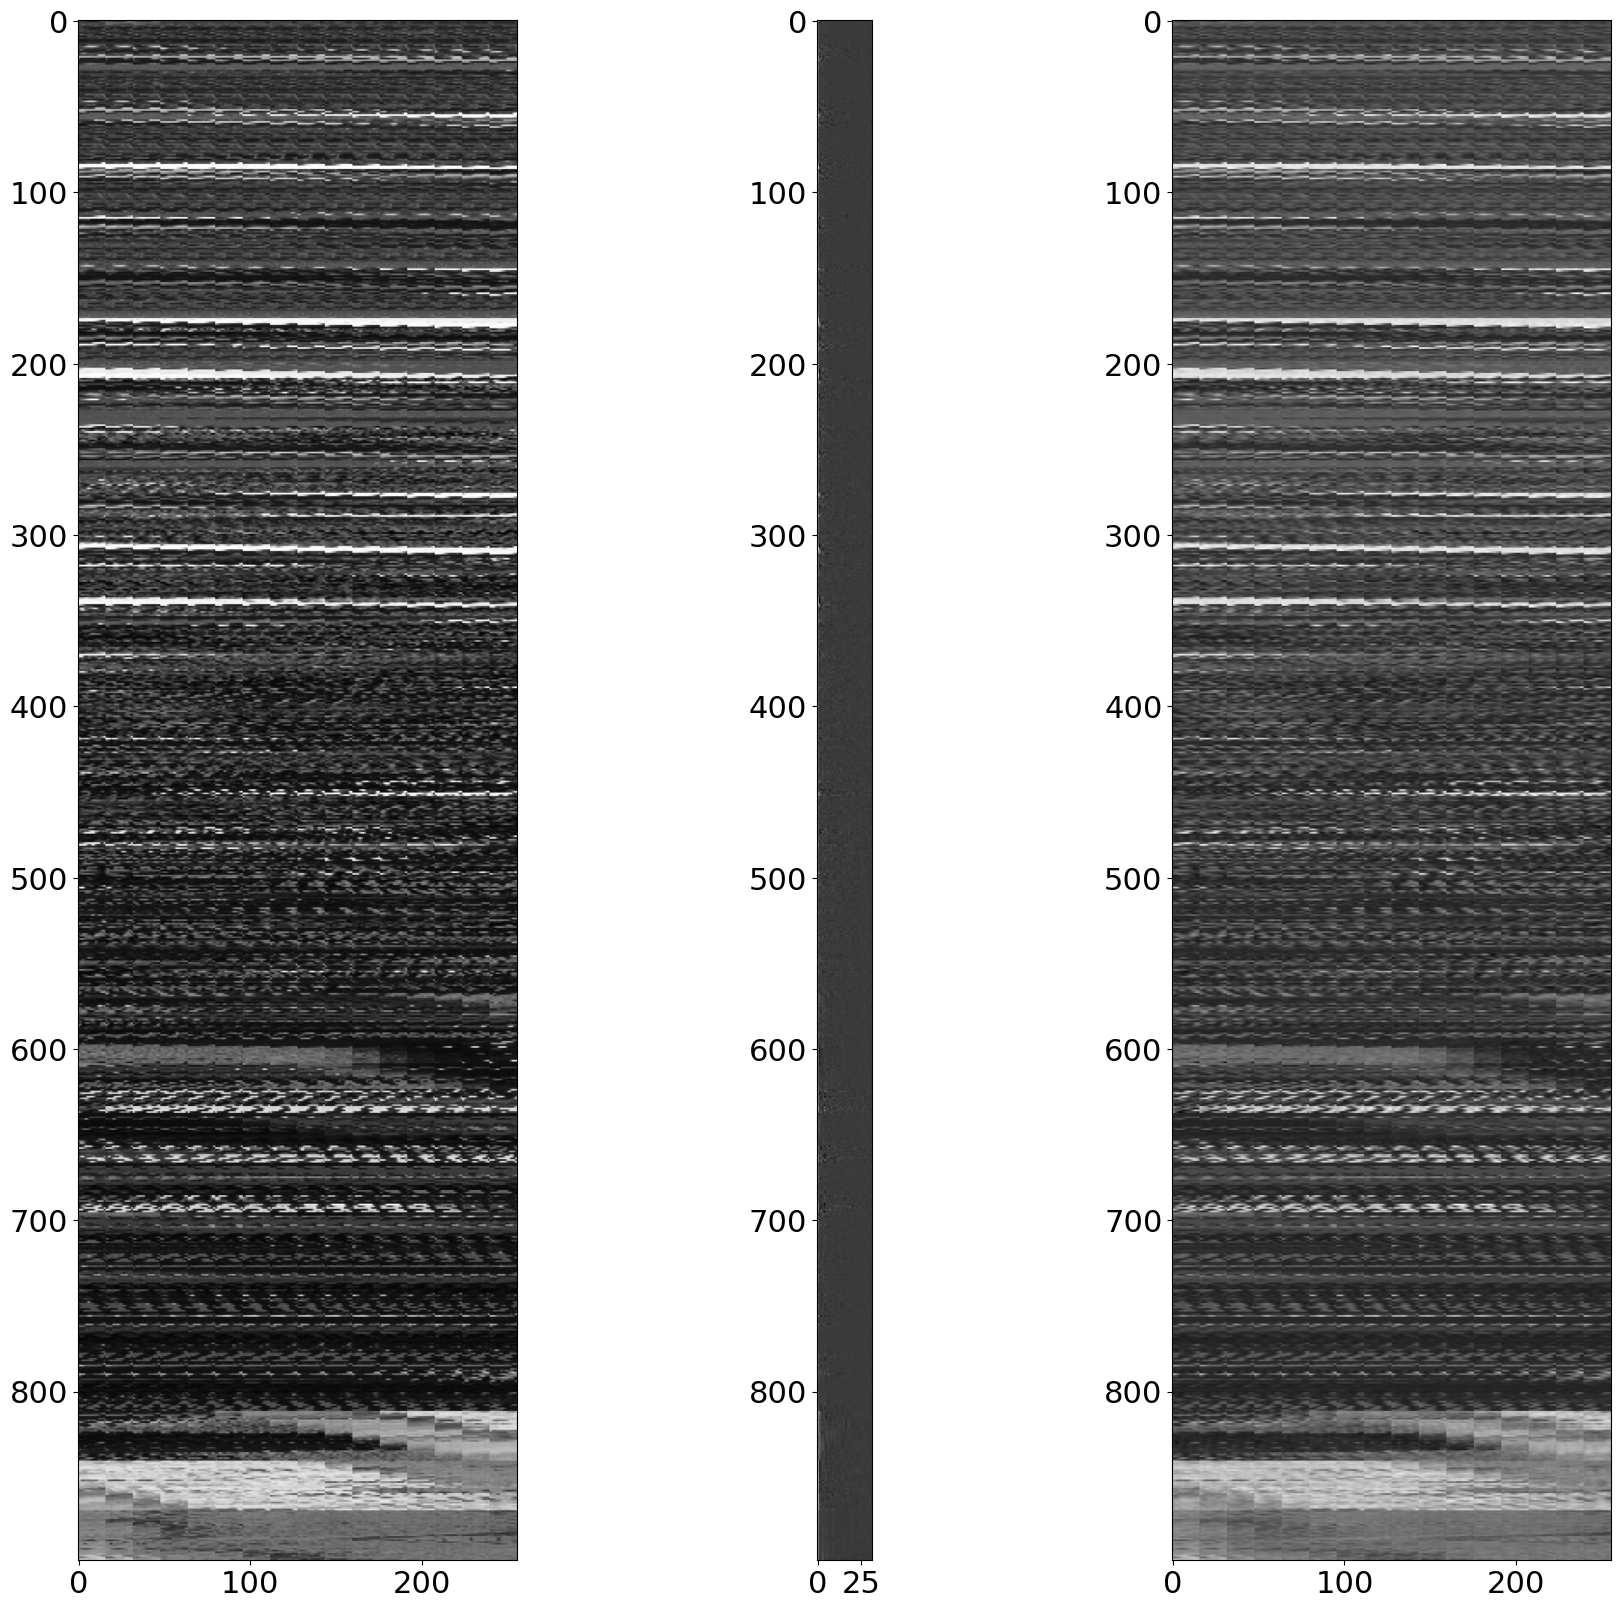

In [ ]:
plt.subplot(1,3,1)
plt.imshow(X,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.matmul(X,np.transpose(P)),cmap='gray')
plt.subplot(1,3,3)
XR=np.matmul(np.matmul(X,np.transpose(P)),P)
plt.imshow(XR,cmap='gray')

recover the image

In [ ]:
redsRecover=np.zeros(reds.shape)
for pip in range(a):
  for pop in range(b):
    redsRecover[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL)]=np.reshape(XR[pip*b+pop,:],(bL,bL))

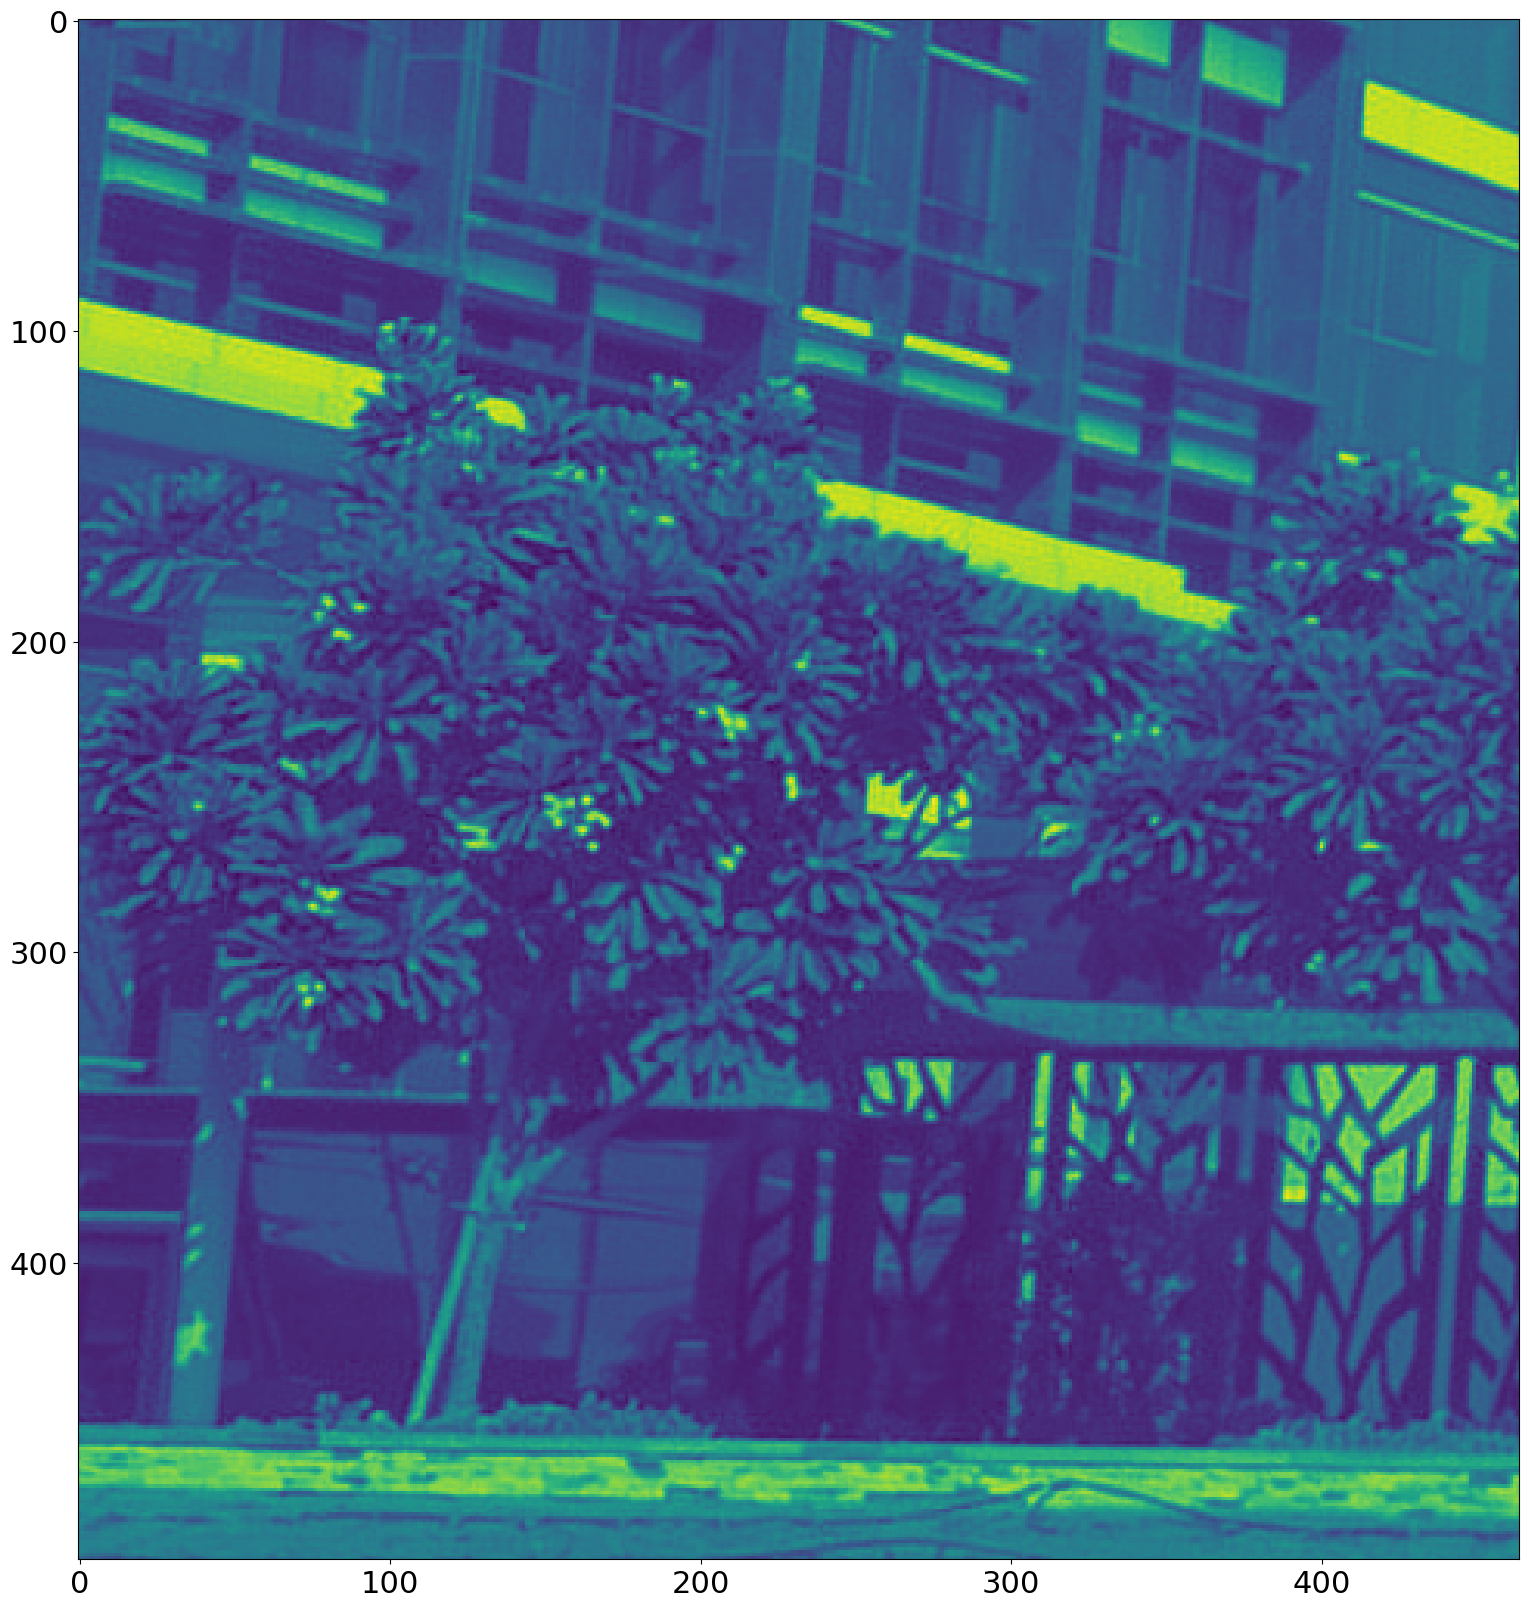

In [ ]:
plt.imshow(redsRecover)

### rate distortion cuve

We analyze the psnr of the recovered image as a function of the number of principal components kept,
The block size here is 16 by 16. Analyzing the distortion for 8 (compression is 32x), 16 (16), 32, 64, 128 features

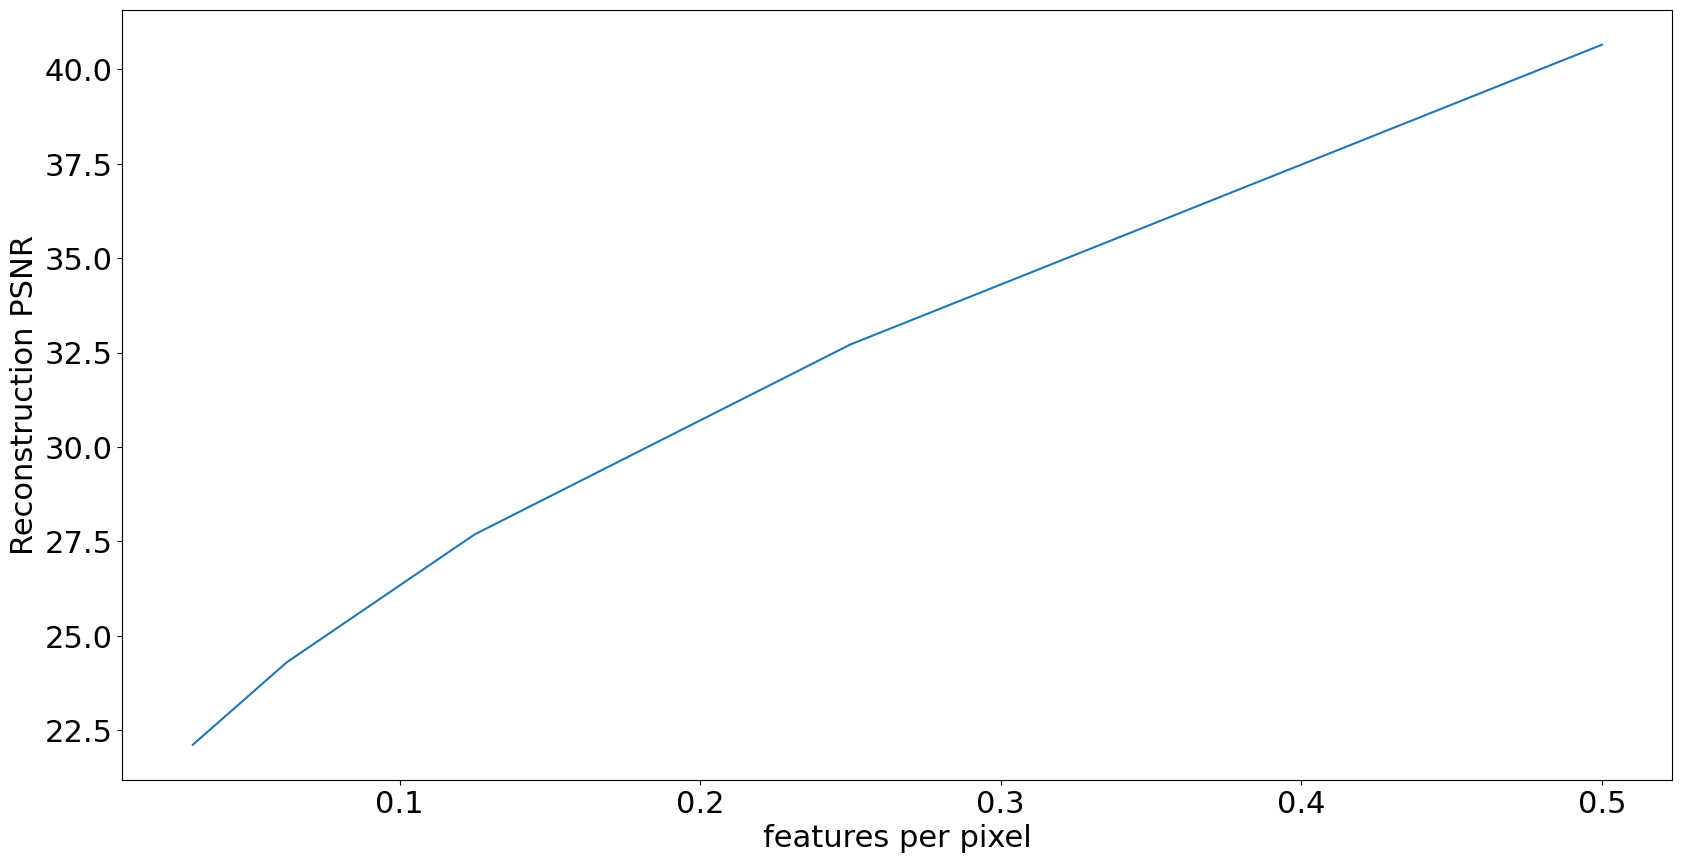

In [ ]:
psnrValues=np.zeros(5)
P=pca.components_[0:8,:]
XR=np.matmul(np.matmul(X,np.transpose(P)),P)
redsRecover=np.zeros(reds.shape)
for pip in range(a):
  for pop in range(b):
    redsRecover[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL)]=np.reshape(XR[pip*b+pop,:],(bL,bL))
psnrValues[0]=cv2.PSNR(reds/1.,redsRecover)
P=pca.components_[0:16,:]                                                                      
XR=np.matmul(np.matmul(X,np.transpose(P)),P)
redsRecover=np.zeros(reds.shape)
for pip in range(a):
  for pop in range(b):
    redsRecover[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL)]=np.reshape(XR[pip*b+pop,:],(bL,bL))
psnrValues[1]=cv2.PSNR(reds/1.,redsRecover)
P=pca.components_[0:32,:]
XR=np.matmul(np.matmul(X,np.transpose(P)),P)
redsRecover=np.zeros(reds.shape)
for pip in range(a):
  for pop in range(b):
    redsRecover[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL)]=np.reshape(XR[pip*b+pop,:],(bL,bL))
psnrValues[2]=cv2.PSNR(reds/1.,redsRecover)
P=pca.components_[0:64,:]
XR=np.matmul(np.matmul(X,np.transpose(P)),P)
redsRecover=np.zeros(reds.shape)
for pip in range(a):
  for pop in range(b):
    redsRecover[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL)]=np.reshape(XR[pip*b+pop,:],(bL,bL))
psnrValues[3]=cv2.PSNR(reds/1.,redsRecover)
P=pca.components_[0:128,:]
XR=np.matmul(np.matmul(X,np.transpose(P)),P)
redsRecover=np.zeros(reds.shape)
for pip in range(a):
  for pop in range(b):
    redsRecover[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL)]=np.reshape(XR[pip*b+pop,:],(bL,bL))
psnrValues[4]=cv2.PSNR(reds/1.,redsRecover) 
plt.figure(figsize=(20,10))
plt.plot(np.divide([8,16,32,64,128],256.),psnrValues)   
plt.ylabel('Reconstruction PSNR')
plt.xlabel('features per pixel')
plt.savefig('PCArateDistortion.pdf')

## random sampling matrics

We consider the principal components of measured data when the image matrix is sampled. Here we consider three examples of a random sampling matrix. In the first case the 256 length vectors of the image block are sampled by meaurement weights drawn from [0,1], in the second case from [-.5,.5] and in the third case pixels are sampled in random groups of 4 with each pixel measured only once, which means that the measurement matrix has orthgonal rows. 

In [ ]:

sM=(np.random.random((256,64)))-.5
#sM=(np.random.random((256,64)))

In [ ]:
xM=np.matmul(X,sM)

In [ ]:
pcaM=PCA(n_components=64)
pcaM.fit(xM)

PCA(n_components=64)

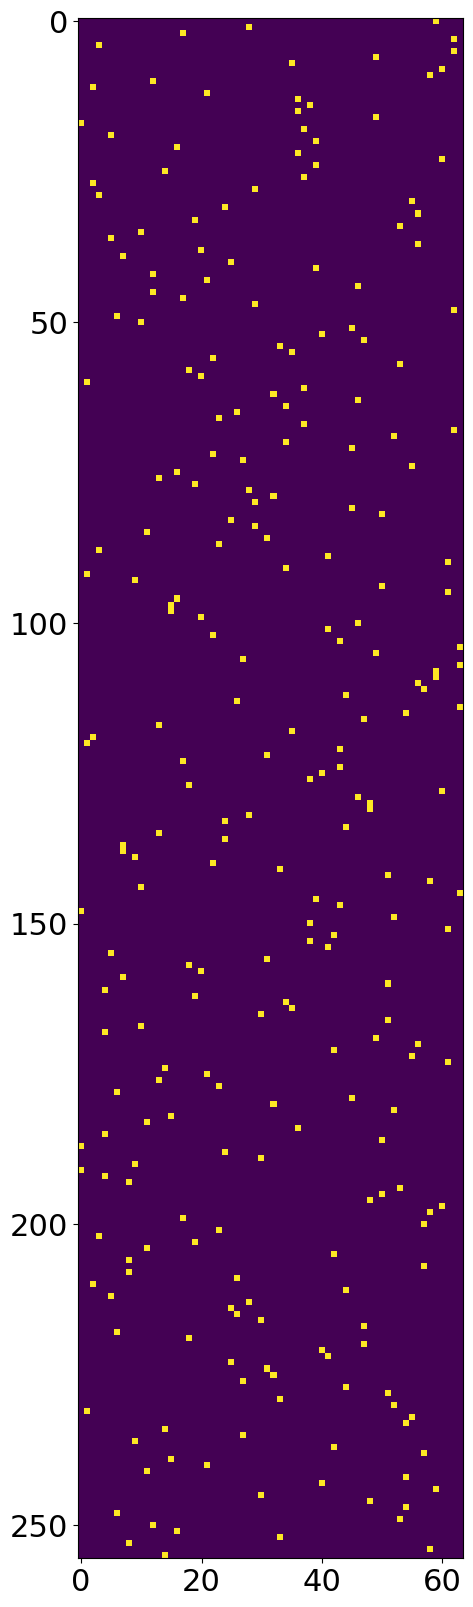

In [ ]:
pip=np.identity(256)
pip=pip[:,np.random.permutation(range(256))]
pop=np.zeros((256,64))
for c in range(64):
    pop[:,c]=pip[:,c*4]+pip[:,c*4+1]+pip[:,c*4+2]+pip[:,c*4+3]
plt.imshow(pop)
    

In [ ]:
xMp=np.matmul(X,pop)

In [ ]:
pcaMp=PCA(n_components=64)
pcaMp.fit(xMp)

PCA(n_components=64)

In [ ]:
pippy=pcaM.singular_values_[0:64]/pcaM.singular_values_[0]

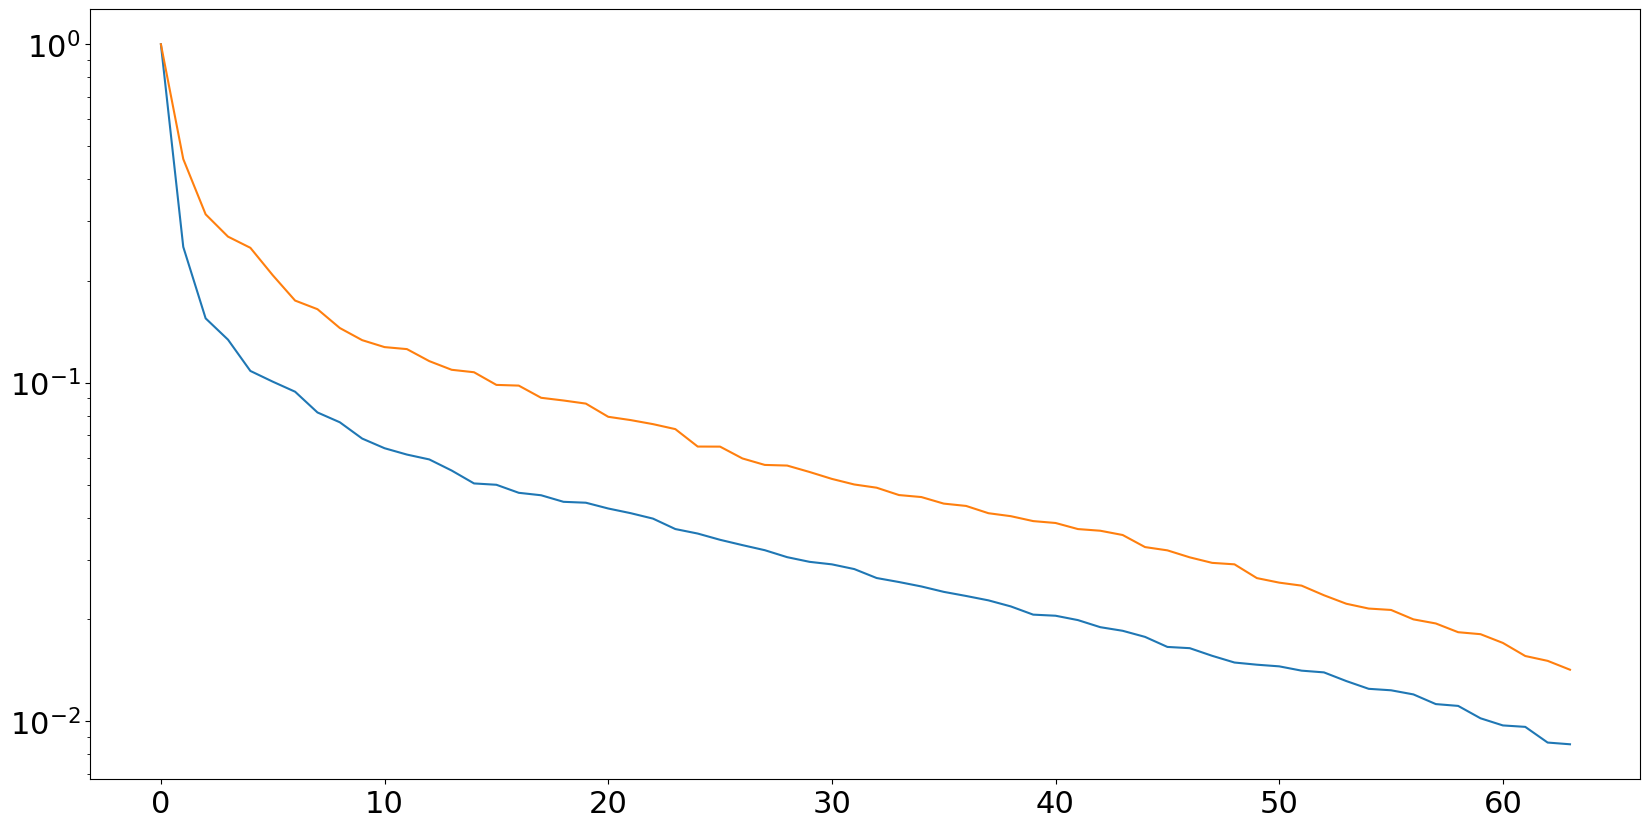

In [ ]:
plt.figure(figsize=(20,10))
plt.semilogy(range(64),pcaMp.singular_values_/pcaMp.singular_values_[0],range(64),pcaM.singular_values_/pcaM.singular_values_[0])

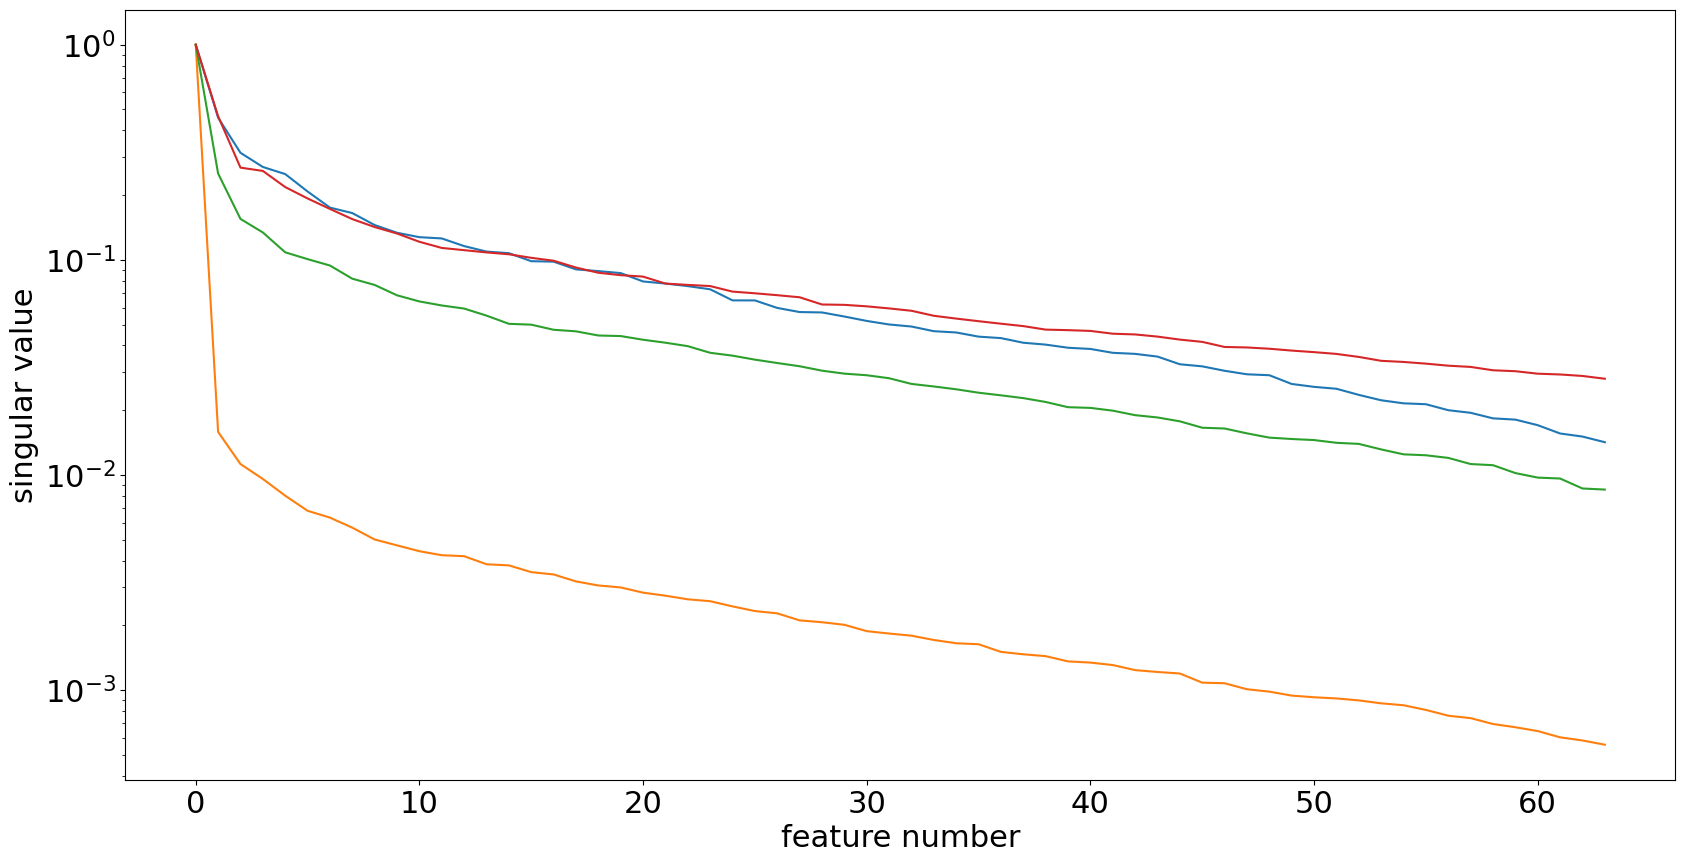

In [ ]:
plt.figure(figsize=(20,10))
plt.semilogy(range(64),pcaM.singular_values_[0:64]/pcaM.singular_values_[0],range(64),pippy,range(64),pcaMp.singular_values_/pcaMp.singular_values_[0],range(64),pca.singular_values_[0:64]/pca.singular_values_[0])
plt.ylabel('singular value')
plt.xlabel('feature number')
plt.savefig('randomPCA.pdf')

###### 

## spectral Images

now we break the RGB image into blocks and compare sampling schemes. Let's assume a sample is a 8 by 8 by 3 array, so a sample vector is of length 432


In [ ]:
bL=8 # each block is bl by bl
a, b=(np.array(reds.shape)/bL).astype('int16')
XC=np.zeros((a*b,bL*bL*3))
XR=np.zeros((a*b,bL*bL))
XG=np.zeros((a*b,bL*bL))
XB=np.zeros((a*b,bL*bL))
XBayer=np.zeros((a*b,bL*bL))
for pip in range(a):
  for pop in range(b):
    XC[pip*b+pop,:]=np.ndarray.flatten(img[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL),:])
    XR[pip*b+pop,:]=np.ndarray.flatten(img[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL),0])
    XG[pip*b+pop,:]=np.ndarray.flatten(img[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL),1])
    XB[pip*b+pop,:]=np.ndarray.flatten(img[(pip*bL):((pip+1)*bL),(pop*bL):((pop+1)*bL),2])
    goe=img[(pip*bL+1):((pip+1)*bL):2,(pop*bL):((pop+1)*bL):2,1]
    geo=img[(pip*bL):((pip+1)*bL):2,(pop*bL+1):((pop+1)*bL):2,1]
    r=img[(pip*bL):((pip+1)*bL):2,(pop*bL):((pop+1)*bL):2,0]
    bl=img[(pip*bL+1):((pip+1)*bL):2,(pop*bL+1):((pop+1)*bL):2,2]
    XBayer[pip*b+pop,:]=np.ndarray.flatten(np.stack((goe,geo,r,bl)))
    

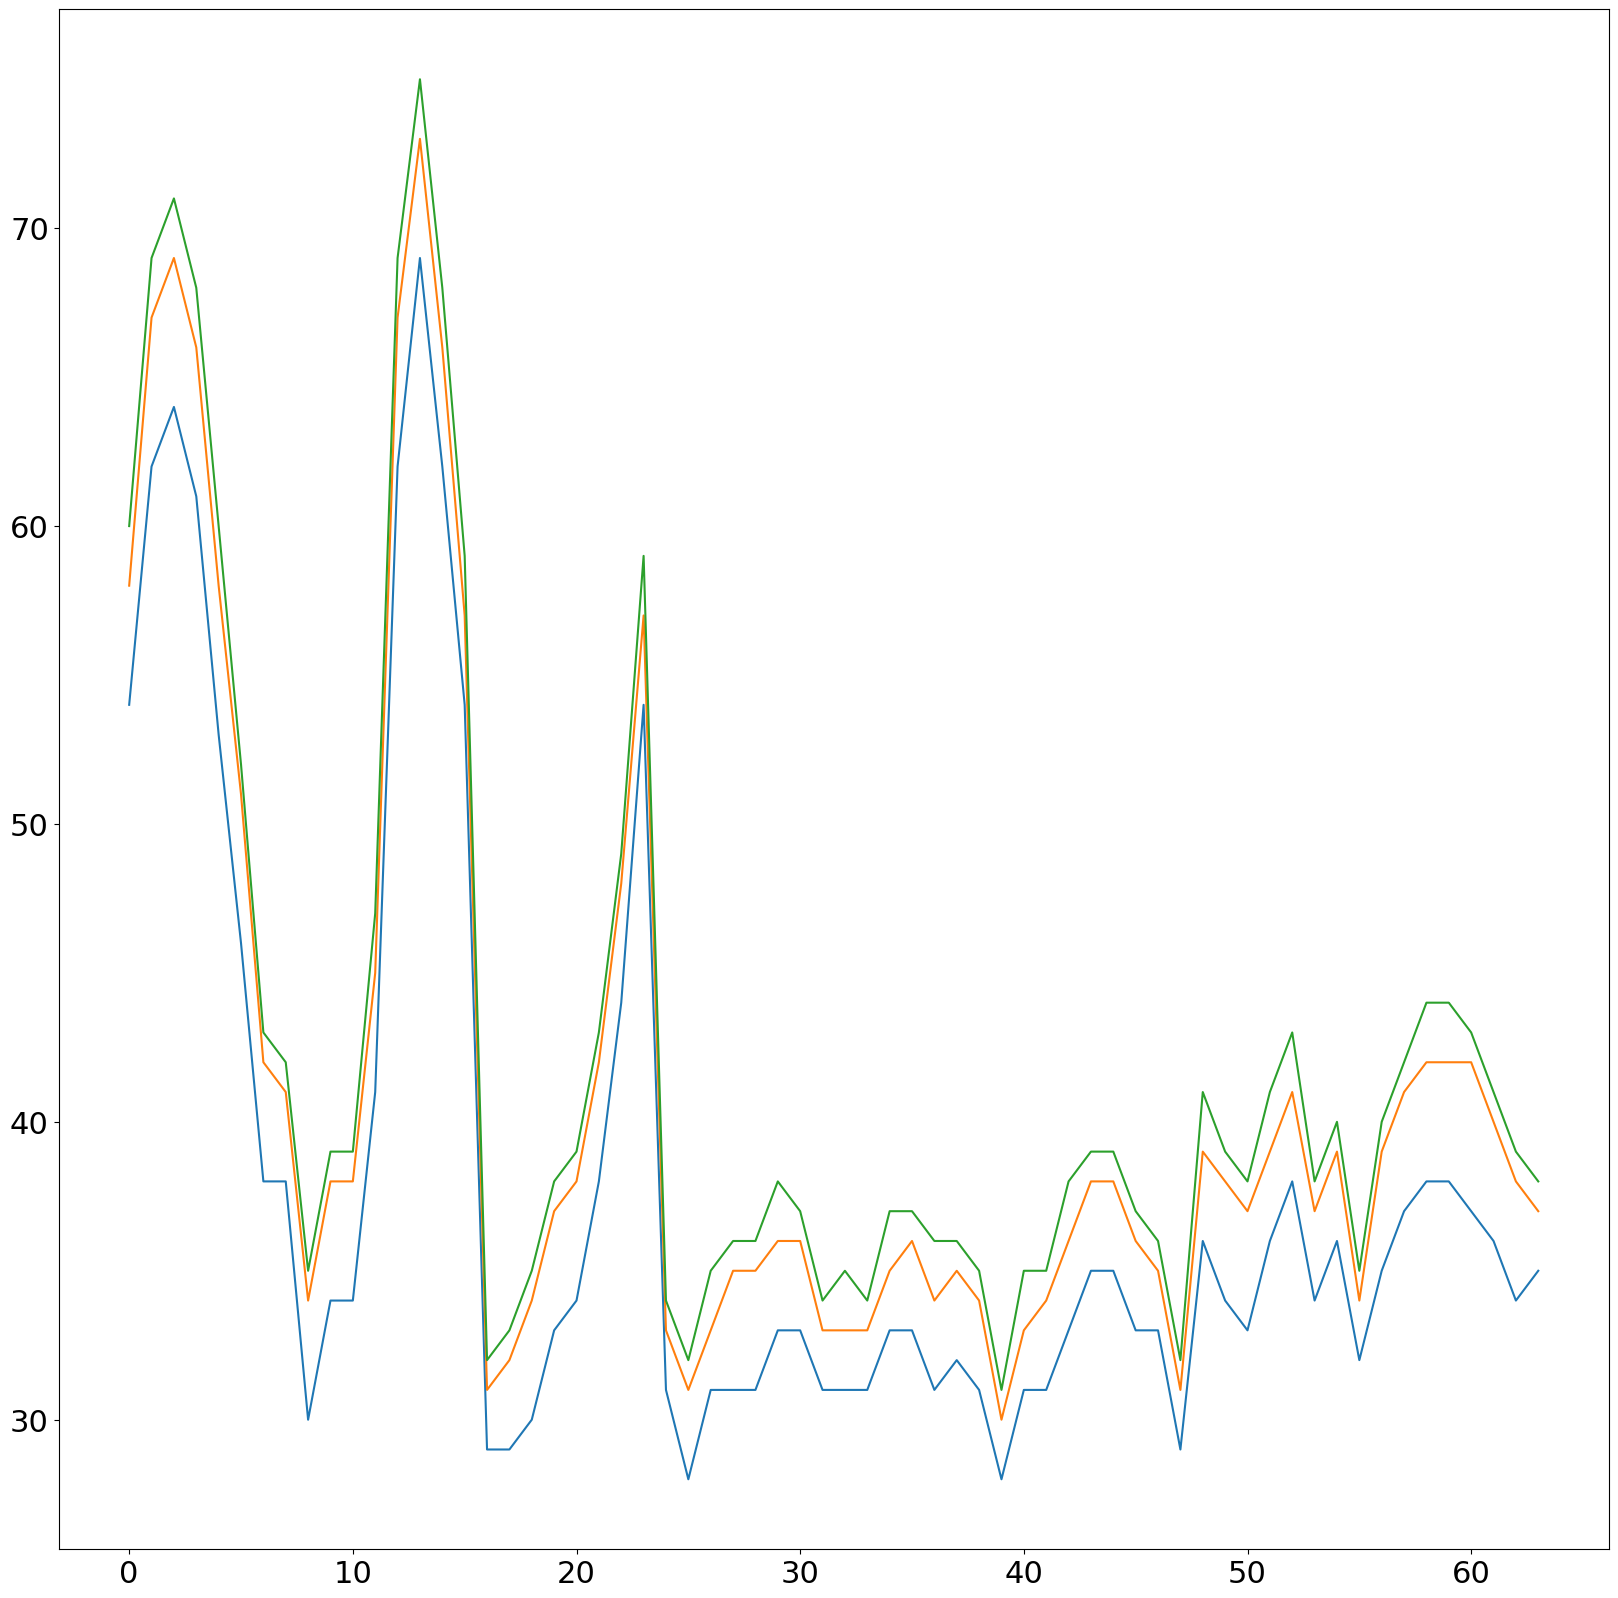

In [ ]:
plt.plot(range(64),XC[10,0::3],range(64),XC[10,1::3],range(64),XC[10,2::3])

In [ ]:
64*3

192

In [ ]:
pcaC=PCA(n_components=64)
pcaC.fit(XC)
pcaG=PCA(n_components=64)
pcaG.fit(XG)
pcaR=PCA(n_components=64)
pcaR.fit(XR)
pcaB=PCA(n_components=64)
pcaB.fit(XB)
pcaBayer=PCA(n_components=64)
pcaBayer.fit(XBayer)

PCA(n_components=64)

In [ ]:
np.mod(2,3)

2

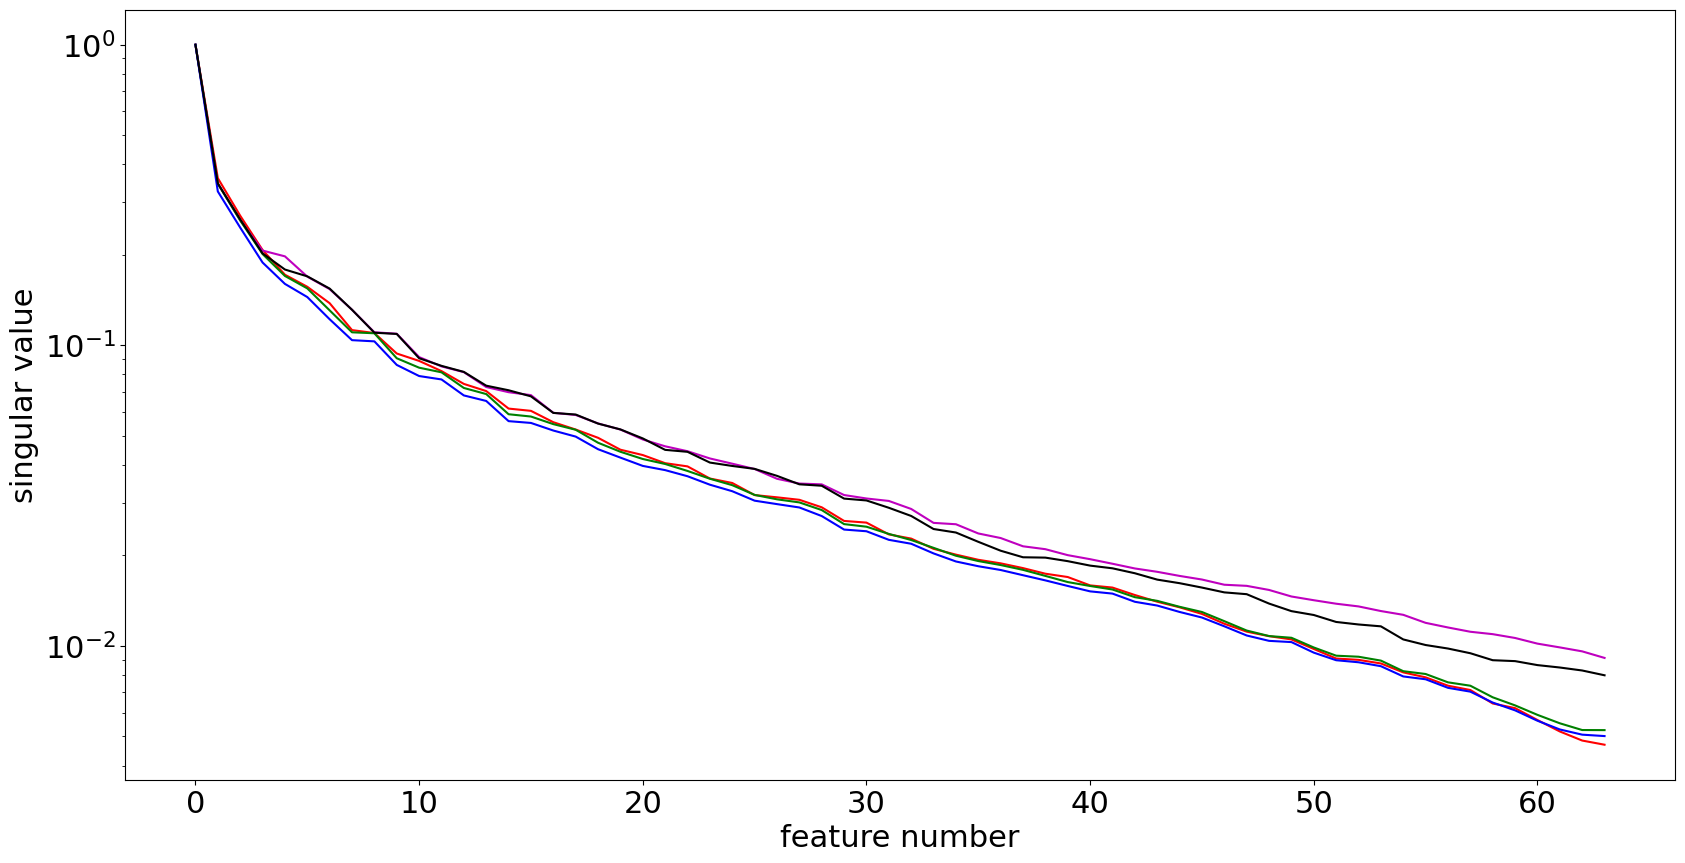

In [ ]:
plt.figure(figsize=(20,10))
plt.semilogy(range(64),pcaR.singular_values_/pcaR.singular_values_[0],'r',range(64),pcaC.singular_values_/pcaC.singular_values_[0],'m',range(64),pcaG.singular_values_/pcaG.singular_values_[0],'g',range(64),pcaB.singular_values_/pcaB.singular_values_[0],'b', pcaBayer.singular_values_/pcaBayer.singular_values_[0],'k')
plt.ylabel('singular value')
plt.xlabel('feature number')
plt.savefig('spectralPCA.pdf')